<a href="https://colab.research.google.com/github/iurykischka/AUT.095/blob/master/Ex/Ex01_sinais_IURY_KISCHKA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ex01 - `[Iury Kischka Mendes]`

Bem vindo!
Neste exercício computacional você utilizará o Jupyter Notebook para utilizar algumas funções preliminares e também para descrever o sistema dinâmico que você utilizará ao longo do semestre.

**Instruções:**
- Use a versão Python 3.x
- Evite sempre usar usar laços `for` e `while`, fazer contas no formato vetorial é sempre mais rápido.
- Não apague os comentários que já existem nas células de código. Mas é claro que você pode adicionar outros comentários.

**Objetivos**
- Iniciar o uso do Jupyter Notebook, usando linguagem Python
- Usar funções das principais bibliotecas, como numpy e matplotlib
- Aplicar conceitos de sinais

## O Jupyter notebook

O Jupyter Notebook é um ambiente interativo de programação em uma página web. Nesse notebook você colocará o código entre os comentários `### SEU CÓDIGO COMEÇA AQUI ###` e `### FIM DO CÓDIGO ###`. Após escrever o código, você pode executar a célula com `Shift+Enter` ou no botão "Run" (com símbolo de "play") na barra de comandos acima.

Em alguns trechos será especificado `(≈ X linhas de código)` nos comentários para que você tenha uma ideia sobre o tamanho do código a ser desenvolvido naquele trecho. Lembrando que é só uma estimativa, o seu código pode ficar maior ou menor do que o especificado.

**Alguns atalhos úteis *no código*:**
- `Ctrl+Enter`: executa a célula e mantém o cursor na mesma célula
- `Shift+Enter`: executa a célula e move o cursor para a próxima célula
- `Ctrl+/`: comenta a linha de código
- `Shift+Tab`: quando o cursor estiver em uma função, mostra um HELP da função

**Alguns atalhos úteis *na célula*:**
- Cria nova célula `a`: acima, `b`: abaixo da céula selecionada
- `d` (2x): deleta célula selecionada
- `m`: define célula como texto (Markdown)
- `y`: define célula como código (Python)
- `l`: mostra numeração das linhas na célula de código
- `c`: copiar, `v`: colar, `x`: recortar célula selecionada
- `ctrl+shift+p`: mostra busca para todos comandos de célula

**Google Colab (opcional)**

Alternativamente ao Jupyter Notebook local, você pode usar o Google Colab (https://colab.research.google.com/) para escrever e rodar códigos na nuvem. O Google disponibiliza servidores que rodam o código remotamente. É fácil de usar, mas talvez você tenha problemas para acessar arquivos locais (como as imagens da "saída esperada" por exemplo). A solução seria utilizar o Drive para trocar arquivos com o Colab (veja como fazer isso [nesse link](https://www.google.com)).

## Primeiros passos
Comece com um `print` de `"Olá mundo"` na célula abaixo.

In [1]:
### SEU CÓDIGO COMEÇA AQUI ### (≈ 1 linha de código)
print ("Olá Mundo")
### FIM DO CÓDIGO ###

Olá Mundo


**Saída esperada**:
Olá mundo
___

A biblioteca NumPy é uma das mais importantes que usaremos. Cálculos matemáticos envolvendo funções, álgebra linear, números aleatórios devem ser procurados nessa biblioteca. Evite usar outras (e.g. math). Para começar, importe a biblioteca `numpy` com o alias `np`, usando o comando:

`import numpy as np`

Na mesma célula abaixo, teste a função seno `np.sin(x)` com entrada `x=75.2` (não precisa criar a variável `x`). Note que ao escrever o comando `np.sin(75.2)` na última linha de código da célula, o retorno da função é ecoado na saída, mostrada logo abaixo da célula. Isso é util às vezes para ver o retorno de uma função sem precisar usar o comando `print`. Se você não quiser que o valor seja ecoado na saída, basta colocar um `;` (ponto e vírgula) após o comando.

In [3]:
### SEU CÓDIGO COMEÇA AQUI ### (≈ 2 linhas de código)
import numpy as np
np.sin(75.2) 
### FIM DO CÓDIGO ###

-0.19692811244968383

**Saída esperada**:
-0.19692811244968383

Na célula abaixo, use as funções abaixo com os respectivos valores apresentados e mostre os resultados na saída. Lembre-se: todas essas funções já estão implementadas no NumPy (https://numpy.org/devdocs/reference/routines.math.html), não é necessário implementá-las manualmente.
1. Exponencial (exp): $e^x$, com $x=7$
1. Sinal (sign): $\rm{sign}(x)$, com $x=-\infty$ (o NumPy tem uma constante para representar "infinito", use-a!)
1. Tangente hiperbólica: $\tanh(x)$, com $x=0.3$
1. Cosseno: $\cos(x)$, com $x=\pi/3$ (o NumPy tem uma constante para representar o "pi", use-a!)

In [16]:
### SEU CÓDIGO COMEÇA AQUI ### (≈ 4 linhas de código)
print ("Exponencial: ", np.exp(7))
print ("Sinal: ", np.sign(-np.inf))
print ("Tangente hiperbólica: ", np.tanh(0.3))
print ("Cosseno: ", np.cos((np.pi)/3))
### FIM DO CÓDIGO ###

Exponencial:  1096.6331584284585
Sinal:  -1.0
Tangente hiperbólica:  0.2913126124515909
Cosseno:  0.5000000000000001


**Saída esperada**:

`
Exponencial (exp):  1096.6331584284585
Sinal (sign):  -1.0
Tangente hiperbólica:  0.2913126124515909
Cosseno:  0.5000000000000001
`
___

## Plotando gráficos
Nesta atividade você implementará um sinal senoidal $x(t)$ de fequência $\omega$ (variável `omega`), representado no tempo "contínuo" (`xc`) e no tempo discreto (`xd`). É claro que em linguagem de programação não é possível representar sinais contínuos, pois é impossível termos uma variável com faixa *contínua* de valores de tempo. Mas aqui, faremos a representação de um sinal contínuo por meio de um sinal amostrado com período de amostragem bem curto (alta frquência de amostragem), de modo a termos a impressão que o sinal é realmente contínuo. Então vamos lá.

### Sinal "contínuo"

Primeiro, vamos representar a variável "tempo contínuo" como um vetor `t` com muitos pontos (período de amostragem curto).

1. importe a biblioteca `matplotlib.pyplot` com alias `plt`, com o comando `import matplotlib.pyplot as plt`
1. use o comando `np.linspace(t0, tf, N)` para criar um vetor de tempo no intervalo $t\in[t_0, t_f]$, com $t_0=0$ e $t_f=7\pi$. Faça um vetor com 100 amostras `N=100`. *Atenção! Vetores muito grandes podem deixar o processamento mais lento!*
1. crie um sinal `xc`, representado por outro vetor, também de tamanho 100, com o seno dos intervalos de tempo apresentados, fazendo simplesmente `np.sin(t)`. O cálculo do seno é feito para cada amostra do vetor `t`.
1. Inicie a figura com o comando `plt.figure(figsize=(8, 1.5))`. Note que os valores `8` e `1.5` são respectivamente a largura e a altura da figura.
1. Mostre o gráfico da função com uma linha contínua. Note que é possível fazer gráficos com diferentes espessuras de linha `lw=2.5`, diferentes cores `c='k'` ('k': preto, 'b': azul, 'r': vermelho, 'g': verde, ...)
1. adicione rótulo aos eixos vertical `$x(t)$` e horizontal `$t$ [s]` (note que os cifrões não aparecem no rótulo e só delimitam o início e fim da sintaxe de equações, escritas no formato LaTex).
1. adicione o título "Senóide de tempo contínuo" na figura

Você deverá usar as funções `plt.plot`, `plt.xlabel`, `plt.ylabel` e `plt.title`. O comando `plt.grid(True)` também é útil para adicionar linhas de referência no gráfico. Este tutorial pode ajudar mais: https://www.delftstack.com/pt/tutorial/matplotlib/line-chart/
(achou um tutorial melhor? Edite esse texto incluindo o link!)

Text(0.5, 1.0, 'Senóide de tempo contínuo')

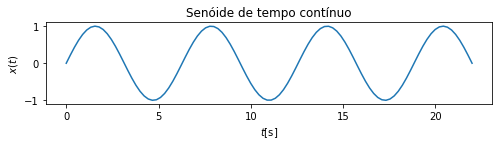

In [17]:
### SEU CÓDIGO COMEÇA AQUI ### (≈ 6 linhas de código)
import matplotlib.pyplot as plt
import numpy as np

t0=0
tf=7*np.pi
N=100

t = np.linspace(t0,tf,N)
xc = np.sin(t)
plt.figure(figsize=(8, 1.5))
plt.plot(t, xc)
plt.ylabel('$x(t)$')
plt.xlabel('$t$[s]')
plt.title("Senóide de tempo contínuo")

### FIM DO CÓDIGO ###

**Saída esperada**
![texto alternativo](https://raw.githubusercontent.com/ifmg-betim/2022.2_AUT.040_ProcSin/main/Ex/Ex01_xc.png)

<mark>**ATENÇÃO:** todos os gráficos serão avaliados e devem incluir, necessariamente, os rótulos dos eixos vertical e horizontal corretamente.</mark>

### Sinal discreto

Outra alternativa para criar vetores de tempo é usando o `np.arange(t0, tf, dt)`, com duas diferenças principais: i) no `np.arange` você especifica o intervalo de amostragem `dt` ao invés do número de pontos `N`, ii) o vetor produzido não inclui o tempo final `tf` especificado. Vamos usar esse comando agora.

1. crie um vetor de amostras `n`, usando o comando `np.arange`, com intervalo de amostragem de `dt=0.5` no intervalo $n\in[0, 7\pi)$
1. crie um sinal amostrado `xd`, a partir do seno de `n`, fazendo `np.sin(n)`. Note que `xd` tem menos elementos do que `xc`, pois o intervalo de amostragem do vetor de amostras `n` é maior que `t`.
1. Inicie a figura com o comando `plt.figure(figsize=(8, 1.5))`.
1. mostre o gráfico do sinal em tempo discreto usando o comando `plt.stem`. *Note que se você utilizar apenas `plt.stem(xd)` o eixo horizontal representará as "amostras" apenas, com números inteiros apenas. Execute o comando `plt.stem(n, xd)` para que o eixo horizontal seja escalado de acordo com o intervalo de tempo (em segundos) correspondente!*
1. adicione rótulo aos eixos vertical `$x_d[n]$` e horizontal `$nT$ [s]`. *Atenção para o eixo horizontal, que não será representado em amostras $n=0, 1, 2, 3, \dots$, mas sim em intervalos de amostragem $nT=0, 0.5, 1.0, 1.5, \dots$* (nesta frase estou usando o ponto como separador decimal)
1. adicione o título "Sinal senoidal de tempo discreto" na figura

Você deverá usar as funções `plt.stem`, `plt.xlabel`, `plt.ylabel` e `plt.title`.

Nota: ao usar `plt.stem`, coloque o parâmetro `use_line_collection` em `True` fazendo `plt.stem(n, xd, use_line_collection=True)`, para melhorar o desempenho (desenhar o gráfico mais rápido).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0.5, 1.0, 'Sinal senoidal de tempo discreto')

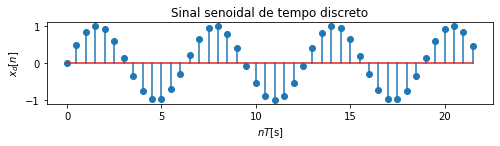

In [19]:
### SEU CÓDIGO COMEÇA AQUI ### (≈ 6 linhas de código)
dt= 0.5
n = np.arange(t0, tf, dt)
xd = np.sin(n)
plt.figure(figsize=(8,1.5))
plt.stem(n,xd)
plt.ylabel('$x_d[n]$')
plt.xlabel('$nT$[s]')
plt.title("Sinal senoidal de tempo discreto")
### FIM DO CÓDIGO ###

**Saída esperada**
<img src="https://raw.githubusercontent.com/ifmg-betim/2022.2_AUT.040_ProcSin/main/Ex/Ex01_xd.png">

### Figuras interativas

Você pode adicionar interatividade nas figuras por meio do `ipympl`. Veja instruções na página https://github.com/matplotlib/ipympl. Será necessário instalar o pacote:
- Abra o "Anaconda Prompt"
- Digite o comando `conda install -c conda-forge ipympl`
- Confirme a instalação e aguarde finalizar com sucesso
- Reinicie o Jupyter Notebook (caso esteja aberto)
- Para ver as figuras interativas você deve executar o comando mágico `%matplotlib widget`
- Caso deseje ver as figuras estáticas execute `%matplotlib inline`

Plote abaixo o sinal $x(t)$ de forma interativa!

In [ ]:
### SEU CÓDIGO COMEÇA AQUI ### (≈ 7 linhas de código)
None
### FIM DO CÓDIGO ###

**Saída esperada**

*Mesma imagem de tempo contínuo, mas interativa, permitindo alterar o tamanho, zoom e movimentação no gráfico.*
___

## Criando a Função Degrau

Crie abaixo uma função que, a partir de um vetor de "tempo" (como os vetores construidos anteriormente), retorne um vetor, de mesma dimensão, com a função degrau unitário. A função deve ter os seguintes parâmetros:
1. Nome da função:
  + `degrau()`
1. Entrada:
  + `t`: vetor de amostras, com dimensão qualquer (para saber a dimensão de um vetor use o comando `np.size` ou `len`)
1. Saída:
  + `u`: vetor com os respectivos valores $u(t^{(i)})$ para cada $i$-ésima amostra do vetor `t`

Use o degrau unitário $u(t)$ como
$$u(t) = 1, \forall t >=0 \\ u(t) = 0, \forall t <0$$

Abaixo você deve fazer o seguinte:
1. Crie a função `degrau()` conforme especificações
1. Use a função criada `degrau()` para gerar um sinal de degrau na variável `u` no intervalo entre $t\in[-5,10]$, com 200 amostras.
2. Crie um outro sinal, na variável `ur`, em que $u_r(t)=u(t)+e(t)$, sendo $e(t)$ um ruído aleatório, gaussiano, com média nula e desvio padrão $\sigma=0.2$.
1. Mostre num único gráfico o sinal $u(t)$, na cor preta, tracejado, com espessura de linha `2`, e o sinal $u_r(t)$, em linha contínua, na cor vermelha, com espessura de linha `0.5`
1. Adicione legenda no gráfico, usando o comando `plt.legend`
1. **Sempre coloque rótulos nos eixos do gráfico!**

Para construir o sinal aleatório $e(t)$ use o comando `np.random.normal(mu, sig, N)`, em que `mu` é a média, `sig` o desvio padrão e `N` o número de elementos do vetor. Mais informações em https://numpy.org/devdocs/reference/random/generated/numpy.random.normal.html#numpy.random.normal

In [ ]:
### SEU CÓDIGO COMEÇA AQUI ### (≈ 18 linhas de código)
def degrau(t):

    return (t >= 0)*1.0

    tempo = np.linspace(-5,10,200)
    deg = degrau(tempo)

    plt.figure()
      plt.plot (tempo,degrau,"--k")
      

### FIM DO CÓDIGO ###

**Saída esperada**
*Gráfico da função degrau junto com um degrau com ruído, semelhante ao apresentado abaixo.*
<img src="https://raw.githubusercontent.com/ifmg-betim/2022.2_AUT.040_ProcSin/main/Ex/Ex01_degrau.png">
___

## Usando a função criada

Use a função criada para produzir um sinal de "pulso" $p(t)$, em que:

$p(t) = 2, \forall -2 < t <= 1 \\ p(t) = 0, \mathrm{c.c.}$

*Lembre-se: é possível produzir um sinal "pulso" a partir de sinais do tipo degrau*. Faça um gráfico do sinal pulso $p(t)$ no intervalo $t\in[-3; 3]$. Não é necessário criar uma função "pulso", mas apenas gerar um sinal correspondente!

**ATENÇÃO**: não é para criar OUTRA FUNÇÃO denominada 'pulso'. É para aproveitar a função `degrau(t)` já implementada na célula acima (todas as células compartilham o workspace de variáveis!) para produzir um sinal do tipo pulso.

In [ ]:
### SEU CÓDIGO COMEÇA AQUI ###
None
### FIM DO CÓDIGO ###

**Saída esperada**

*Gráfico da função pulso com dimensões apropriadas, rótulo nos eixos e título na imagem.*
___
Fim (ufa... acabou rápido? Faça o desafio abaixo!)


## Desafio! (opcional, se você não fizer, não perderá pontos)

Procure saber o que é "relação sinal-ruído" (signal-to-noise ratio), abreviado como SNR, e como é calculada. Faça um texto explicando e mostrando a forma de calcular. Como exemplo, faça três gráficos de sinais senoidais idênticos somados com diferentes ruídos (sinais aleatórios com diferentes variâncias). Calcule o SNR para cada um dos sinais e apresente no título de cada gráfico para comparação o SNR calculado em amplitude e em dB.

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ifmg-betim/2021.2_AUT.040_ProcSin/HEAD?filepath=atividades%2FEx01%20-%20Atividade%20de%20sinais.ipynb)